##  Oasis Internship task 2 by Vatsal Zaveri

# Unemployment Analysis with Python

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import datetime

In [2]:
# libraries for graphical visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#importing dataset
unemp_df= pd.read_csv('Unemployment.csv')
unemp_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
unemp_df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

##### removing blank space from some columns

In [5]:
unemp_df.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [6]:
# after changes
unemp_df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
unemp_df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

##### Note:- 'Date' column is object, need to convert it into 'datetime'

In [8]:
unemp_df['Date']=pd.to_datetime(unemp_df['Date'])
unemp_df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

##### Summary Statistics of the columns

In [9]:
round(unemp_df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].describe(),2)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.00,740.00,740.00
mean,11.79,7204460.03,42.63
std,10.72,8087988.43,8.11
min,0.00,49420.00,13.33
25%,4.66,1190404.50,38.06
50%,8.35,4744178.50,41.16
75%,15.89,11275489.50,45.50
max,76.74,45777509.00,72.57


In [10]:
unemp_df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

##### each column contain 28 null values. As compare to dataset, these are small records and dropping these record is good option

In [11]:
# dropping the columns with null values
unemp_df.dropna(axis=0,inplace=True)
# after dropping
unemp_df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

##### checking total number of duplicated records in our dataframe

In [12]:
unemp_df.duplicated().sum()

0

NO Duplicate records present in our dataframe

##### diplaying the correlation between those columns

In [13]:
unemp_df[['Estimated Unemployment Rate (%)','Estimated Employed','Estimated Labour Participation Rate (%)']].corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


##### Creating new columns from 'Date' columns

Creating **day**, **month** & **year** column from unemp_df['Date']

In [14]:
unemp_df['day']=unemp_df['Date'].dt.day
unemp_df['month']=unemp_df['Date'].dt.month_name()
unemp_df['year']=unemp_df['Date'].dt.year

In [15]:
# after changes
unemp_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


#### Analysing Data using Visualisation plots (graphs )

In [16]:
# value count for each category in Region column
unemp_df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

#### Count plot
Show the counts of observations in each categorical bin using bars. 

Value count for each state using count plot

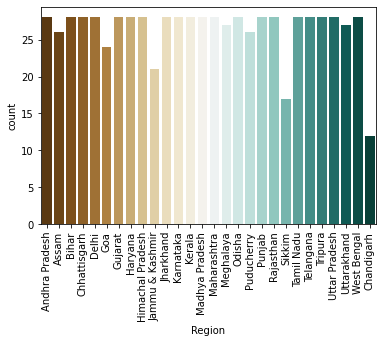

In [17]:
sns.countplot(x=unemp_df['Region'],palette = "BrBG")
plt.xticks(rotation='vertical')
plt.show()

In [18]:
# value count for each category in ['Area'] column
unemp_df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

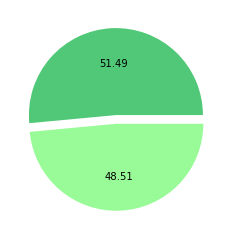

In [19]:
# note :- explode is for slicing any part from graph 
plt.pie(x=unemp_df['Area'].value_counts(),autopct='%0.2f',explode = [0,0.1], colors=[ '#50C878','#98FB98'])
plt.show()

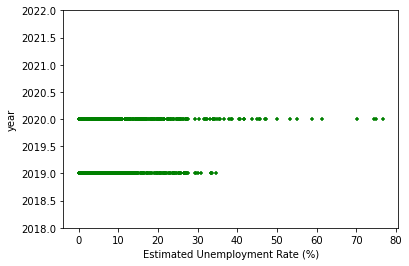

In [20]:
unemp_df.plot(kind="scatter", x='Estimated Unemployment Rate (%)', y='year', color = 'g', marker = '+')
# for changing y_axis range from 2018 to 2022
plt.ylim(2018,2022)
plt.show()

##### Note :- Unemployment Rate in 2019 was very less as compare to 2020 

<AxesSubplot:xlabel='Estimated Labour Participation Rate (%)', ylabel='Region'>

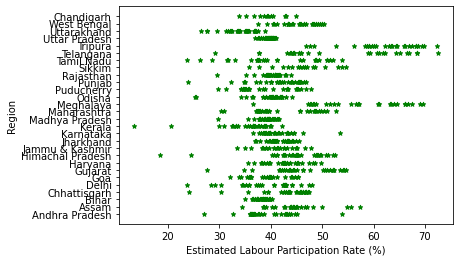

In [21]:
unemp_df.plot(kind="scatter", x='Estimated Labour Participation Rate (%)', y='Region', marker = '*', color='g')

#### Note : Labour Participation Rate in 'Meghalaya' , 'Tripura', and 'Telangana' were high in between 2019-2020

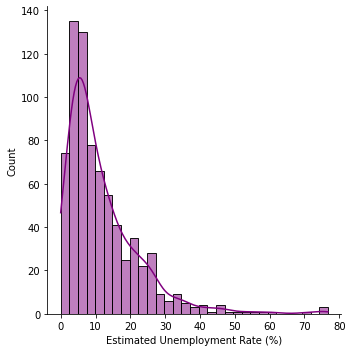

In [22]:
sns.displot(x = unemp_df['Estimated Unemployment Rate (%)'], kde =True, color = 'purple')

<b>Note :- these are not Outliers , 
    Due to Pandemic , sudden hike in 'Estimated Unemployment Rate (%)' recorded

#### Heatmap to understand the correlation between various features

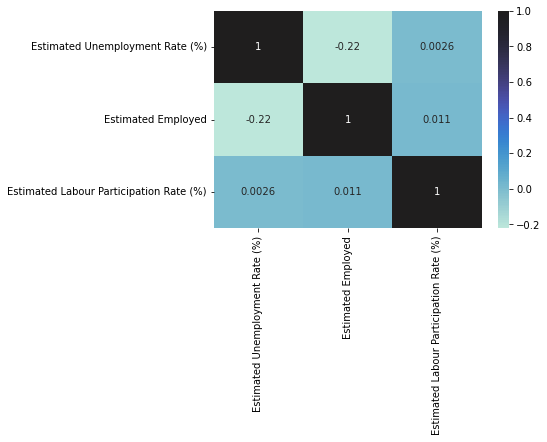

In [23]:
sns.heatmap(unemp_df[['Estimated Unemployment Rate (%)','Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),annot=True, center=1)
plt.show()           